# Lemur Demo: Phenotypic HBN Data
### Imports & Setting up the data

In [21]:
# Outside imports
import pandas as pd
import numpy as np
import os
from IPython.display import display
from plotly.offline import (download_plotlyjs,
                            init_notebook_mode)
init_notebook_mode()

# Load the Phenotypic data and clean it up
BASE = "/home/ryan/Code/DMZ/"
df = pd.read_csv(os.path.join(BASE, "top6.csv"))
df = df[df["ConsensusDx,NoDX"] == 2]
del df["ConsensusDx,NoDX"]
df.index = df["ConsensusDx,DX_01_Cat"]
df.index.name = "DiagnosticCode"
del df["ConsensusDx,DX_01_Cat"]
del df["Identifiers"]
df[df == "."] = np.nan
df[df == ".."] = np.nan
df[df == "nan"] = np.nan
df = df.iloc[30:230]
df.index = list(map(lambda x: x.split(",")[0], df.index))

# Load the lemur library
import sys
sys.path.append("../../../")
import lemur.datasets as lds
import lemur.metrics as lms
import lemur.plotters as lpl
import lemur.embedders as leb

# Create a lemur dataset based on the phenotypic data
DFD = lds.DFDataSet(df, name="Phenotypic")

# Create a lemur distance matrix based on the phenotypic data
DM = lds.DistanceMatrix(DFD, lms.NanDotProduct)

In [22]:
lpl.DistanceMatrixHeatmap(DM, mode="html").plot()

In [3]:
lpl.DistanceMatrixEigenvectorHeatmap(DM, mode="html").plot()

In [4]:
lpl.DistanceMatrixScreePlotter(DM, mode="html").plot()

In [23]:
lpl.DendrogramPlotter(DM, mode="html").plot()

In [6]:
MDSEmbedder = leb.MDSEmbedder(num_components=3)

In [7]:
lpl.EmbeddingHeatmap(DM, mode="html").plot(MDSEmbedder)

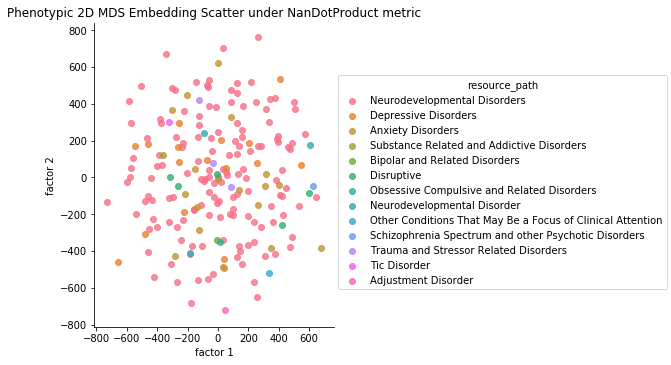

In [8]:
lpl.Embedding2DScatter(DM).plot(MDSEmbedder)

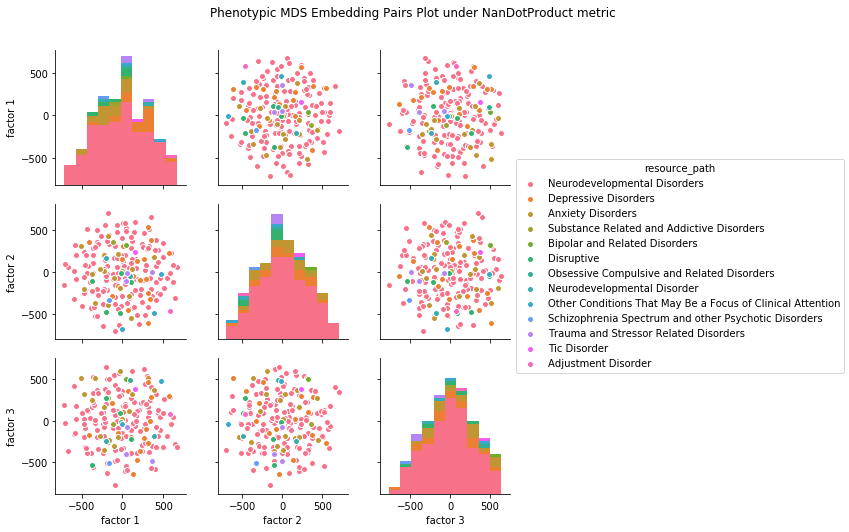

In [9]:
lpl.EmbeddingPairsPlotter(DM).plot(MDSEmbedder)

In [10]:
lpl.EmbeddingParallelCoordinatePlotter(DM, mode="html").plot(MDSEmbedder)

In [11]:
TSNEEmbedder = leb.TSNEEmbedder(num_components=3)

In [12]:
lpl.EmbeddingHeatmap(DM, mode="html").plot(TSNEEmbedder)

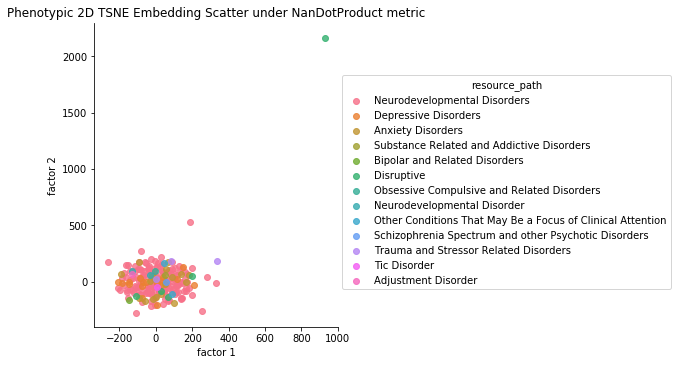

In [13]:
lpl.Embedding2DScatter(DM).plot(TSNEEmbedder)

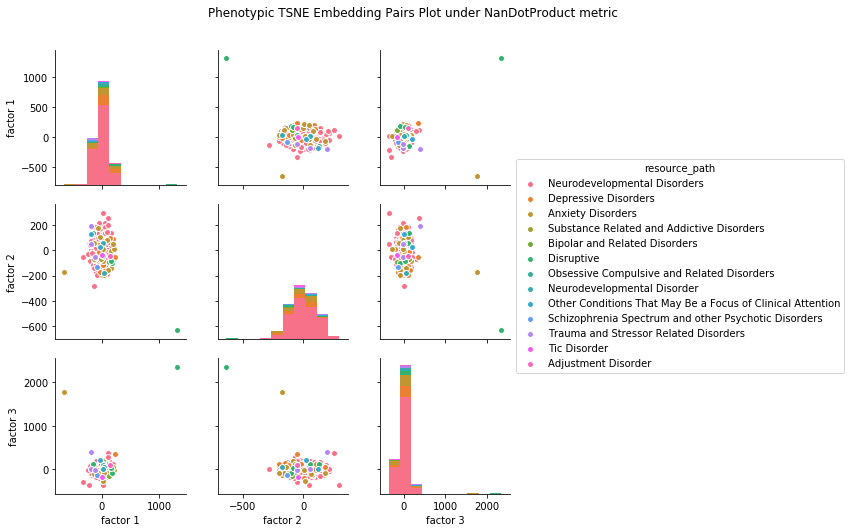

In [14]:
lpl.EmbeddingPairsPlotter(DM).plot(TSNEEmbedder)

In [24]:
lpl.EmbeddingParallelCoordinatePlotter(DM, mode="html").plot(TSNEEmbedder)

In [16]:
PCAEmbedder = leb.PCAEmbedder(num_components=3)

In [17]:
lpl.EmbeddingHeatmap(DM, mode="html").plot(PCAEmbedder)

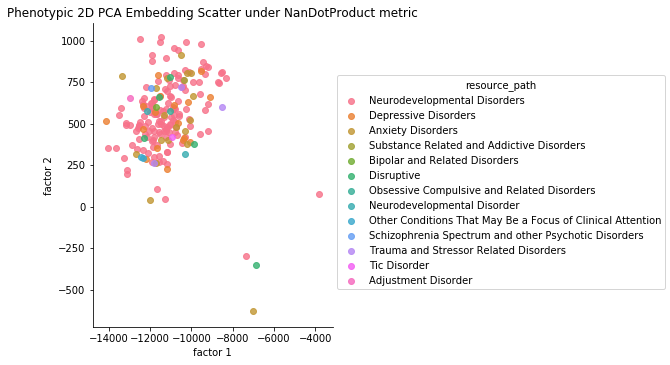

In [18]:
lpl.Embedding2DScatter(DM).plot(PCAEmbedder)

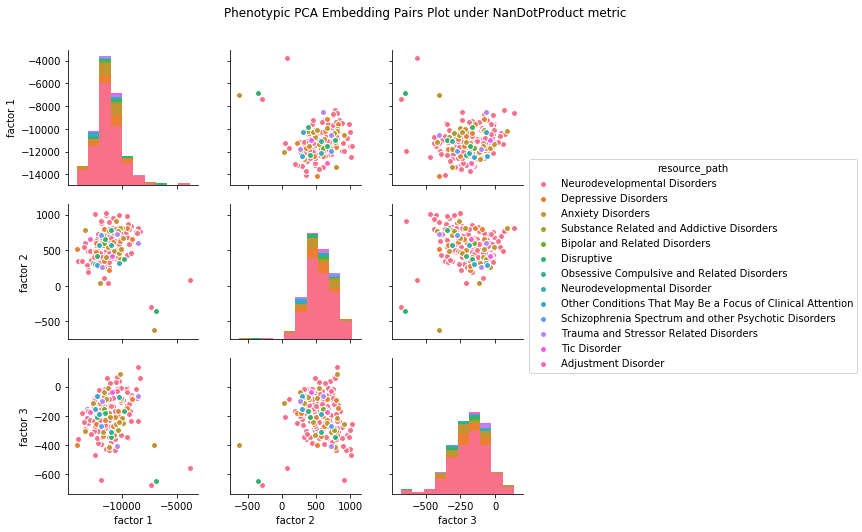

In [19]:
lpl.EmbeddingPairsPlotter(DM).plot(PCAEmbedder)

In [20]:
lpl.EmbeddingParallelCoordinatePlotter(DM, mode="html").plot(PCAEmbedder)